# Features Explanation

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make
purchases

BALANCEFREQUENCY : How frequently the Balance is updated,
score between 0 and 1 (1 = frequently updated, 0 = not
frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in
one-go

INSTALLMENTSPURCHASES : Amount of purchase done in
installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are
being made, score between 0 and 1 (1 = frequently purchased, 0
= not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases
are happening in one-go (1 = frequently purchased, 0 = not
frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently
purchases in installments are being done (1 = frequently done, 0
= not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in
advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash
in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made
by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

# Imports

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

from sklearn.mixture import GaussianMixture

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# EDA

In [66]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [67]:
df.shape

(8950, 18)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [69]:
df = df.drop(['CUST_ID'],axis=1)

In [70]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [71]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [72]:
df = df.fillna(0)

In [73]:
df.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.75, 0.9, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
BALANCE,8950.0,1564.474828,2081.531879,0.0,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.0,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.0,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.0,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.0,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.0,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.0,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.0,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.50000


C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


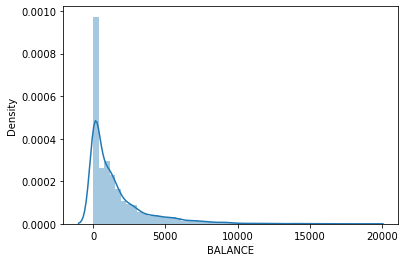

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


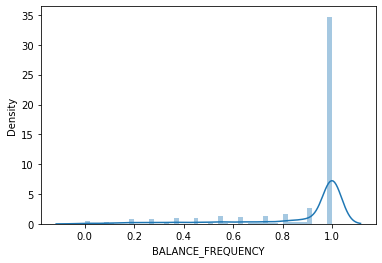

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


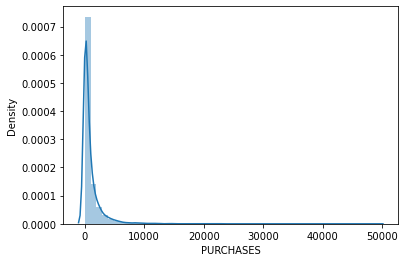

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


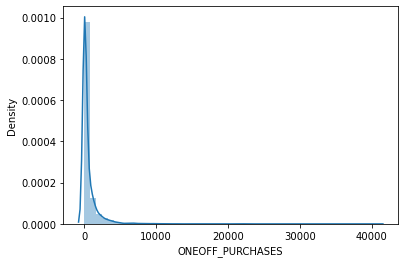

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


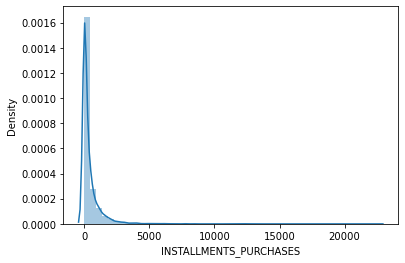

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


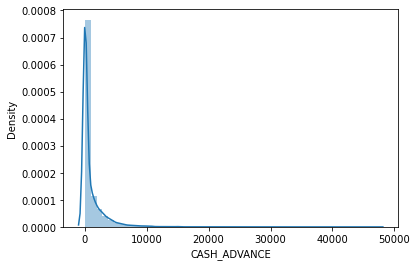

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


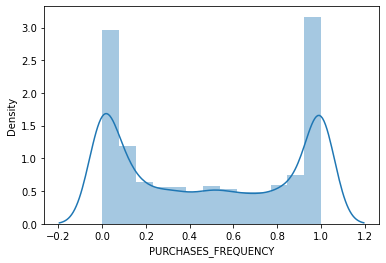

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


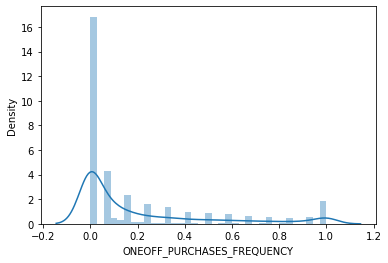

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


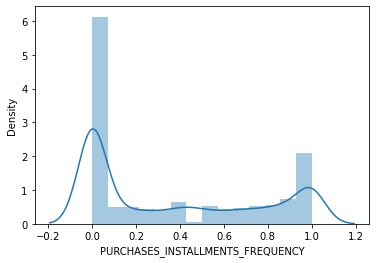

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


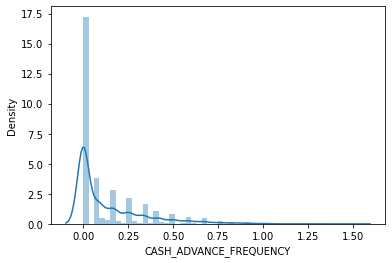

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


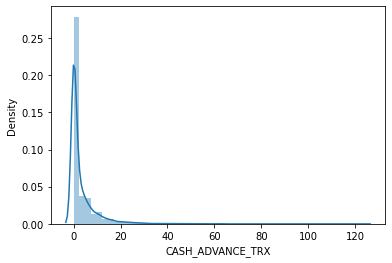

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


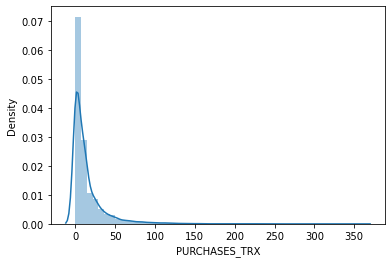

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


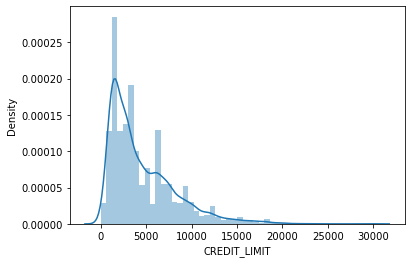

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


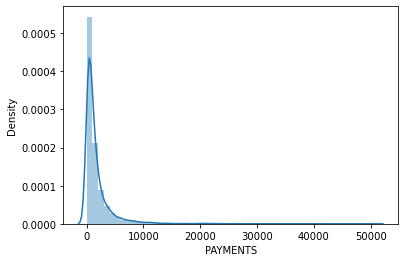

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


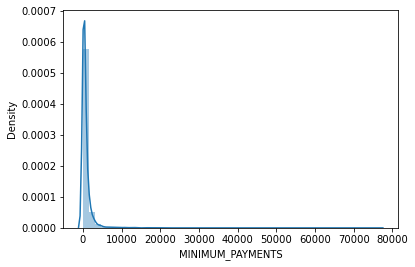

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


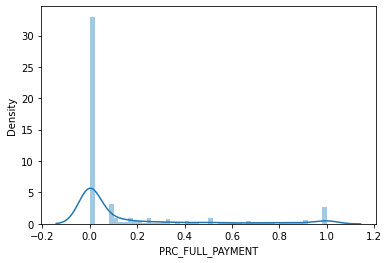

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


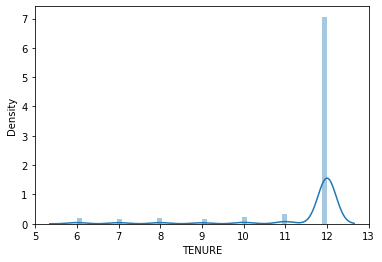

In [74]:
for x in df.columns:
    sns.distplot(df[x])
    plt.show()

In [75]:
df_no_out = df[df['BALANCE'] < df['BALANCE'].quantile(0.99)]
df_no_out = df_no_out[df_no_out['PURCHASES'] < df_no_out['PURCHASES'].quantile(0.99)]
df_no_out = df_no_out[df_no_out['CASH_ADVANCE'] < df_no_out['CASH_ADVANCE'].quantile(0.99)]
df_no_out = df_no_out[df_no_out['PAYMENTS'] < df_no_out['PAYMENTS'].quantile(0.99)]
df_no_out = df_no_out[df_no_out['MINIMUM_PAYMENTS'] < df_no_out['MINIMUM_PAYMENTS'].quantile(0.99)]
df_no_out = df_no_out[df_no_out['INSTALLMENTS_PURCHASES'] < df_no_out['INSTALLMENTS_PURCHASES'].quantile(0.99)]

In [76]:
df_no_out.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.75, 0.9, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
BALANCE,8424.0,1359.232794,1706.294061,0.0,0.007349,8.249768,21.974151,112.015020,794.258812,1844.945627,3739.702359,5238.521589,7673.339411,9335.314170
BALANCE_FREQUENCY,8424.0,0.873260,0.240008,0.0,0.090909,0.272727,0.454545,0.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8424.0,783.805907,1146.610123,0.0,0.000000,0.000000,0.000000,39.745000,346.005000,1022.500000,2196.266000,3145.403000,5513.949200,8534.580000
ONEOFF_PURCHASES,8424.0,465.149282,920.550699,0.0,0.000000,0.000000,0.000000,0.000000,30.000000,525.767500,1437.338000,2303.863500,4440.340000,8218.320000
INSTALLMENTS_PURCHASES,8424.0,318.893767,505.149067,0.0,0.000000,0.000000,0.000000,0.000000,80.550000,436.820000,1003.703000,1447.423500,2300.354200,2935.890000
CASH_ADVANCE,8424.0,797.010804,1453.813727,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1008.421443,2757.879062,4013.105173,6626.384680,9337.271222
PURCHASES_FREQUENCY,8424.0,0.483592,0.398574,0.0,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8424.0,0.195505,0.292114,0.0,0.000000,0.000000,0.000000,0.000000,0.083333,0.250000,0.666667,0.916667,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8424.0,0.354998,0.392832,0.0,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8424.0,0.129002,0.192227,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.416667,0.571429,0.833333,1.500000


In [77]:
##REMOVED DATA - treated as outliers
print(format((1-8424/8950)*100,'.2f'),'%')

5.88 %


C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


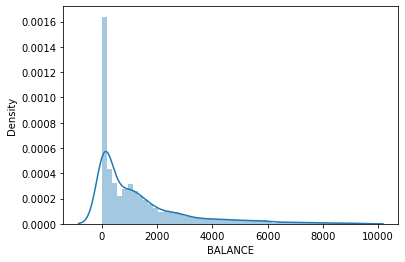

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


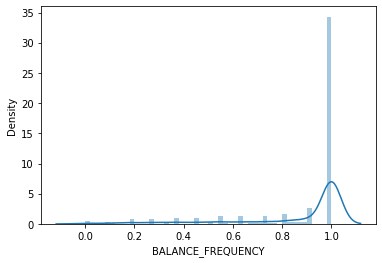

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


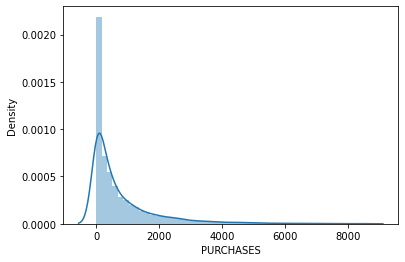

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


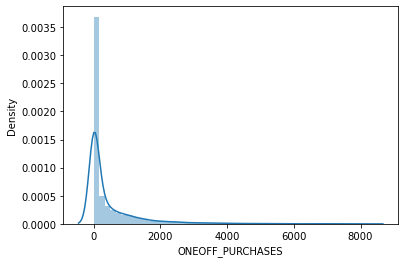

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


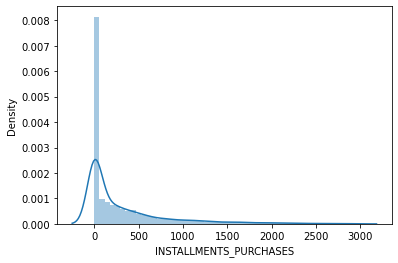

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


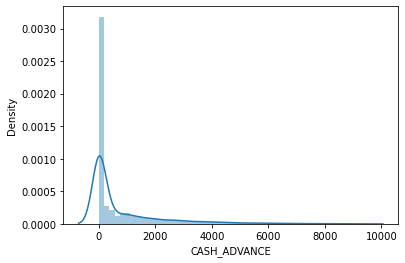

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


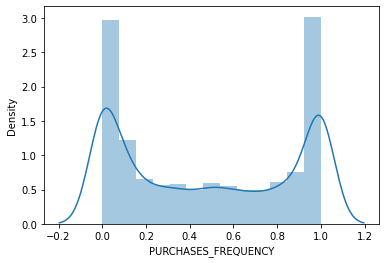

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


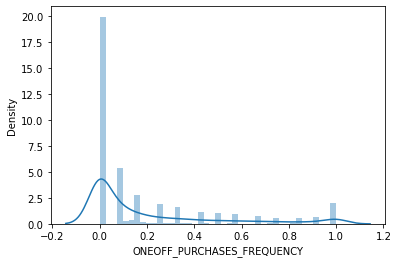

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


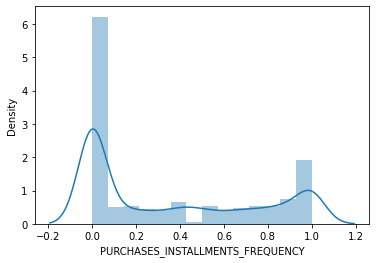

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


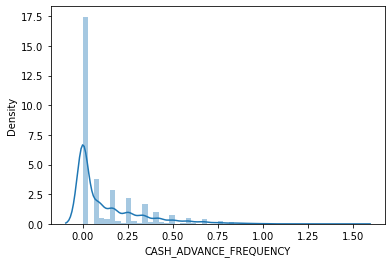

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


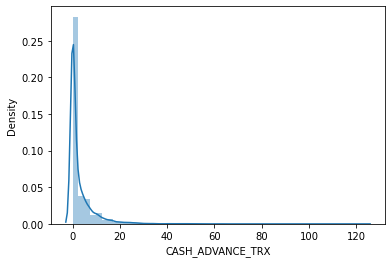

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


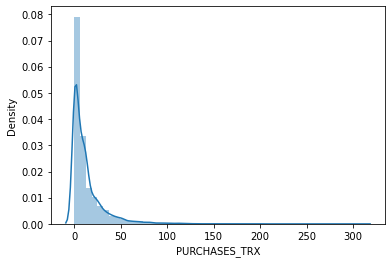

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


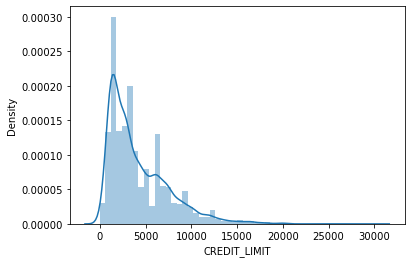

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


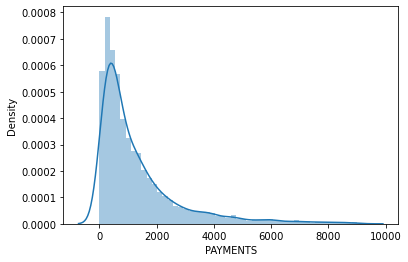

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


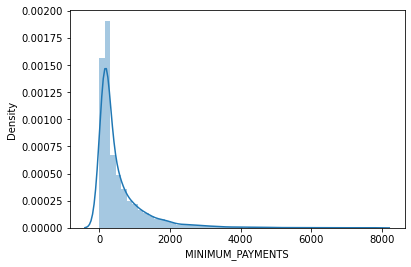

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


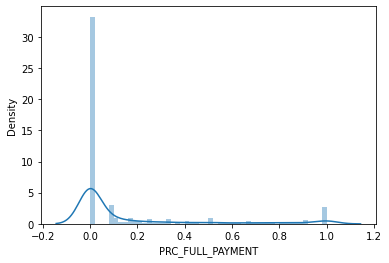

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


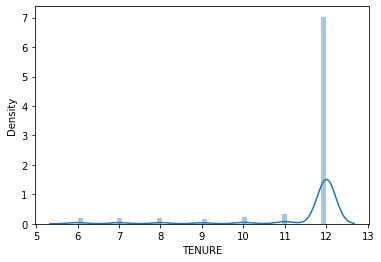

In [78]:
for x in df_no_out.columns:
    sns.distplot(df_no_out[x])
    plt.show()

In [79]:
##Most of the data is right skewed, so before scaling, it worth trying a transformation
df_no_out.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [80]:
right_skewed = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'PAYMENTS', 'MINIMUM_PAYMENTS']

In [81]:
df_transform = df_no_out

In [82]:
df_transform[right_skewed] = np.cbrt(df_transform[right_skewed])

In [83]:
df_transform.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.445433,0.818182,4.569298,0.000000,4.569298,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.259921,1000.0,5.865547,5.186426,0.000000,12
1,14.739913,0.909091,0.000000,0.000000,0.000000,18.607791,0.000000,0.000000,0.000000,0.250000,1.587401,0.000000,7000.0,16.009152,10.235542,0.222222,12
2,13.563304,1.000000,9.178217,9.178217,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.289428,7500.0,8.536483,8.560286,0.000000,12
3,11.856320,0.636364,11.444598,11.444598,0.000000,5.903914,0.083333,0.083333,0.000000,0.083333,1.000000,1.000000,7500.0,0.000000,0.000000,0.000000,12
4,9.351197,1.000000,2.519842,2.519842,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,1.000000,1200.0,8.786475,6.255547,0.000000,12


C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


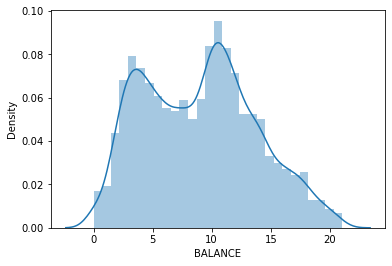

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


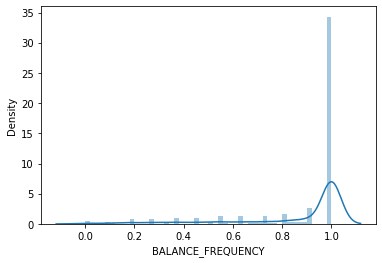

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


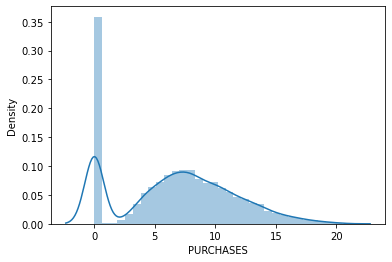

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


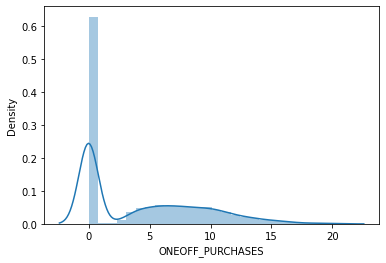

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


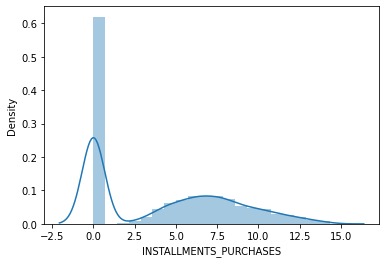

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


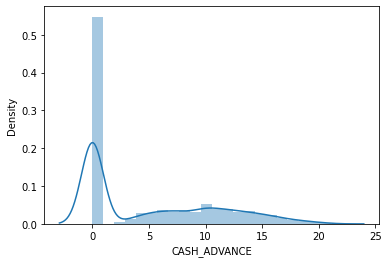

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


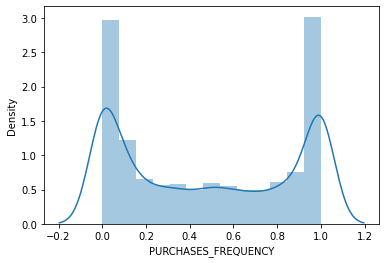

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


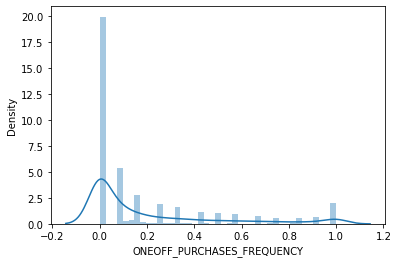

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


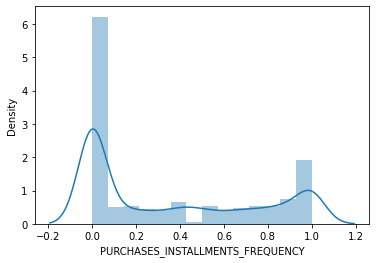

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


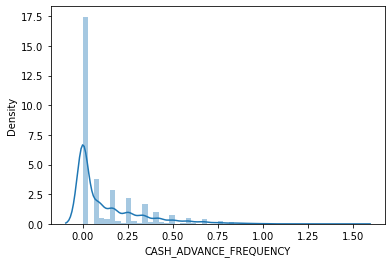

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


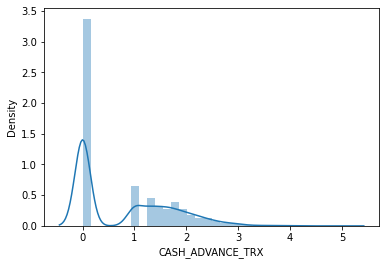

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


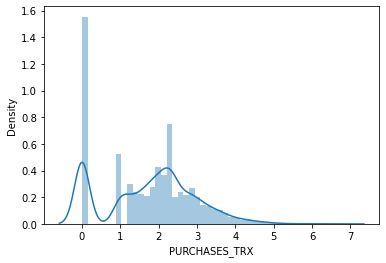

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


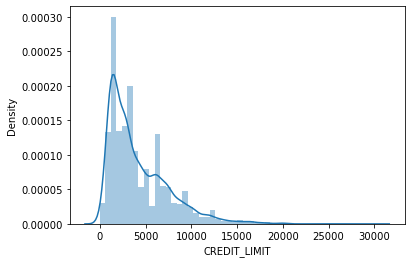

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


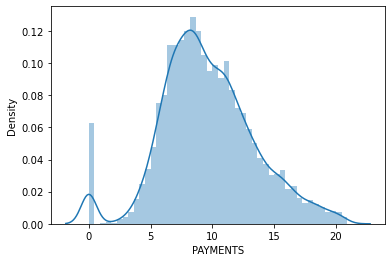

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


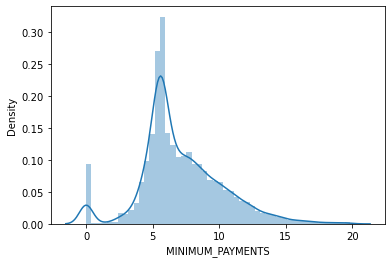

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


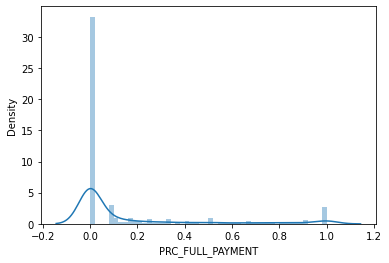

C:\Users\hmjesus\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


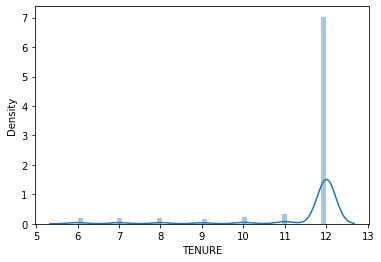

In [84]:
for x in df_transform.columns:
    sns.distplot(df_transform[x])
    plt.show()

<AxesSubplot:>

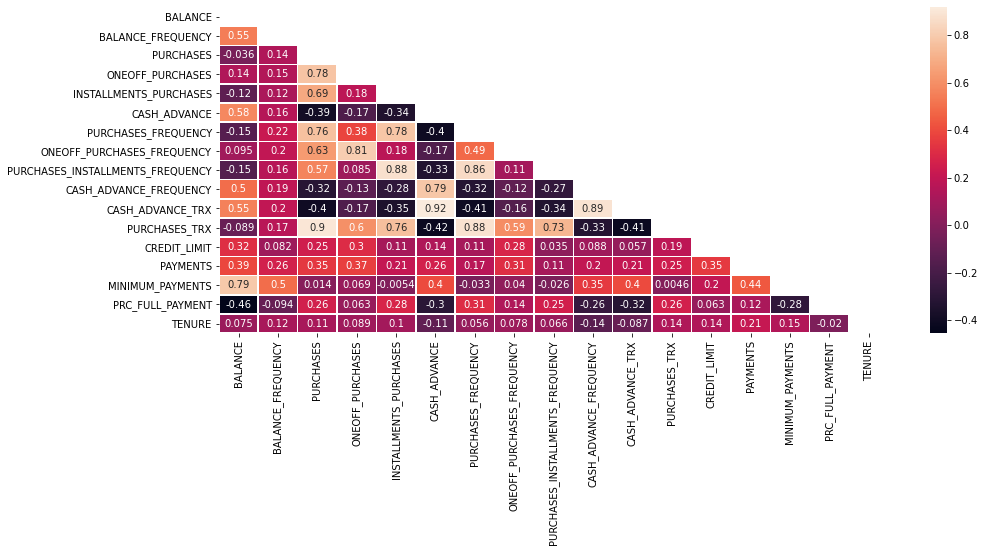

In [85]:
plt.figure(figsize=(15,6))
mask = np.zeros_like(df_transform.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_transform.corr(), mask = mask, annot = True, linewidths = 0.5)

In [86]:
##As we can see, there's some strong correlation. It open space to multicolinearity. Next step: check VIF.
##In this model, we'll be accepting VIF < 25
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_transform.values, i) for i in range(df_transform.shape[1])]
vif["features"] = df_transform.columns

In [87]:
vif

,VIF Factor,features
0,26.512346,BALANCE
1,25.630695,BALANCE_FREQUENCY
2,65.632382,PURCHASES
3,22.050406,ONEOFF_PURCHASES
4,18.451169,INSTALLMENTS_PURCHASES
5,13.669432,CASH_ADVANCE
6,40.628943,PURCHASES_FREQUENCY
7,9.078183,ONEOFF_PURCHASES_FREQUENCY
8,25.542733,PURCHASES_INSTALLMENTS_FREQUENCY
9,7.408216,CASH_ADVANCE_FREQUENCY


In [88]:
df_transform2 = df_transform.drop(['PURCHASES_TRX','PURCHASES_FREQUENCY','TENURE','PURCHASES'],axis=1)
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(df_transform2.values, i) for i in range(df_transform2.shape[1])]
vif2["features"] = df_transform2.columns

In [89]:
vif2

,VIF Factor,features
0,24.783200,BALANCE
1,14.475483,BALANCE_FREQUENCY
2,5.809732,ONEOFF_PURCHASES
3,9.851543,INSTALLMENTS_PURCHASES
4,13.518181,CASH_ADVANCE
5,4.299853,ONEOFF_PURCHASES_FREQUENCY
6,8.641918,PURCHASES_INSTALLMENTS_FREQUENCY
7,7.100439,CASH_ADVANCE_FREQUENCY
8,22.050666,CASH_ADVANCE_TRX
9,3.576217,CREDIT_LIMIT


<AxesSubplot:>

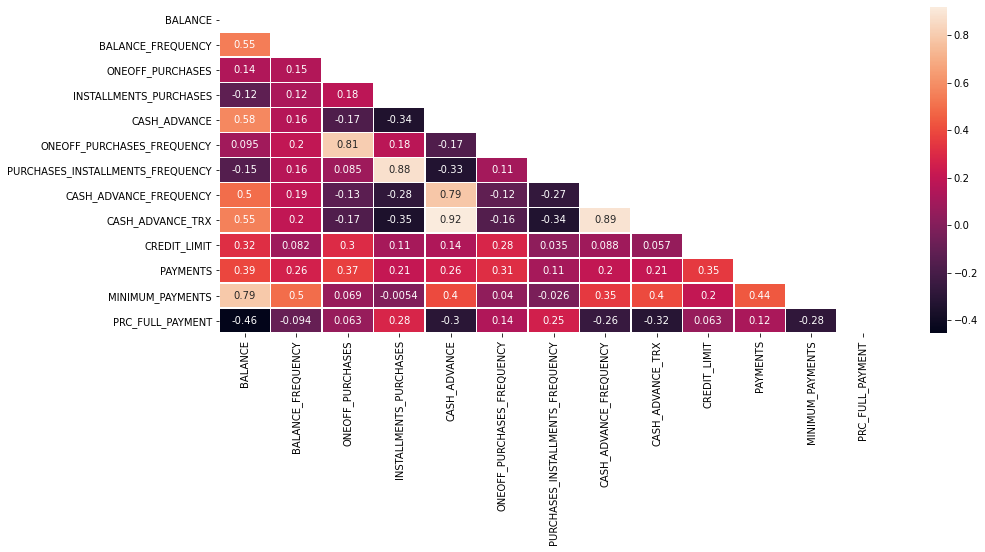

In [90]:
plt.figure(figsize=(15,6))
mask = np.zeros_like(df_transform2.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_transform2.corr(), mask = mask, annot = True, linewidths = 0.5)

In [91]:
##there still have some strong corr, but let's keep going and standardize all the data
scaler = StandardScaler()
scaler.fit(df_transform2.drop(['CREDIT_LIMIT'],axis=1))

StandardScaler()

In [93]:
df_scaler = pd.DataFrame(scaler.transform(df_transform2.drop(['CREDIT_LIMIT'],axis=1)), columns = df_transform2.drop(['CREDIT_LIMIT'],axis=1).columns)

In [94]:
df_scaler.head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-1.162373,-0.229499,-0.882420,0.095733,-0.837429,-0.669318,-0.691595,-0.671130,-0.864599,-0.996767,-0.633821,-0.522343
1,1.209006,0.149298,-0.882420,-0.997128,2.301467,-0.669318,-0.903742,0.629491,0.882255,1.679398,0.994776,0.239956
2,0.961966,0.528096,1.007867,-0.997128,-0.837429,2.754211,-0.903742,-0.671130,-0.864599,-0.292100,0.454420,-0.522343
3,0.603569,-0.987094,1.474637,-0.997128,0.158486,-0.384025,-0.903742,-0.237591,0.235850,-2.544262,-2.306708,-0.522343
4,0.077596,0.528096,-0.363449,-0.997128,-0.837429,-0.384025,-0.903742,-0.671130,-0.864599,-0.226145,-0.288976,-0.522343


# Clustering

In [95]:
#As all features are transformed and look similar to normal distribution (apart from the zeros), let's assume it is normal
#The Clustering method applied will be Gaussian Mixture
gm = GaussianMixture(3)

In [97]:
df_scaler['Cluster'] = gm.fit_predict(df_scaler).astype('str')

In [98]:
df_scaler.Cluster.value_counts()

2    3905
0    2334
1    2185
Name: Cluster, dtype: int64

Text(0.5, 0, 'n_components')

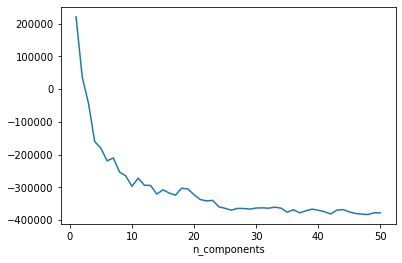

In [99]:
#The first clustering model didn't result in balanced clusters. Let's Find the best number with BIC
n_components = np.arange(1,51)
models = [GaussianMixture(n, covariance_type='full', random_state = 0).fit(df_scaler)
          for n in n_components]

plt.plot(n_components, [m.bic(df_scaler) for m in models], label = 'BIC')
plt.xlabel('n_components')

In [100]:
#Using the modulus of the lowest number (20)
gm2 = GaussianMixture(20)

In [101]:
df_scaler['Cluster'] = gm2.fit_predict(df_scaler).astype('str')
df_scaler.Cluster.value_counts()

1     1325
16    1195
14    1108
13     729
5      628
6      510
15     483
9      426
3      341
4      278
17     270
10     229
0      224
19     220
7      217
8      128
18      78
12      16
11      11
2        8
Name: Cluster, dtype: int64

In [102]:
df_scaler

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Cluster
0,-1.162373,-0.229499,-0.882420,0.095733,-0.837429,-0.669318,-0.691595,-0.671130,-0.864599,-0.996767,-0.633821,-0.522343,16
1,1.209006,0.149298,-0.882420,-0.997128,2.301467,-0.669318,-0.903742,0.629491,0.882255,1.679398,0.994776,0.239956,14
2,0.961966,0.528096,1.007867,-0.997128,-0.837429,2.754211,-0.903742,-0.671130,-0.864599,-0.292100,0.454420,-0.522343,9
3,0.603569,-0.987094,1.474637,-0.997128,0.158486,-0.384025,-0.903742,-0.237591,0.235850,-2.544262,-2.306708,-0.522343,14
4,0.077596,0.528096,-0.363449,-0.997128,-0.837429,-0.384025,-0.903742,-0.671130,-0.864599,-0.226145,-0.288976,-0.522343,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,-1.244490,0.528096,-0.882420,0.588031,-0.837429,-0.669318,1.217732,-0.671130,-0.864599,-0.729249,-1.127309,1.192832,16
8420,-1.323723,0.528096,-0.882420,0.603988,-0.837429,-0.669318,1.217732,-0.671130,-0.864599,-0.826811,-2.306708,-0.522343,6
8421,-1.285247,-0.166368,-0.882420,0.257663,-0.837429,-0.669318,0.793439,-0.671130,-0.864599,-1.401475,-0.903012,0.335244,16
8422,-1.386364,-0.166368,-0.882420,-0.997128,-0.277569,-0.669318,-0.903742,0.195952,0.521880,-1.556062,-1.074470,0.335244,14


# Regression

In [103]:
dummy = pd.get_dummies(df_scaler['Cluster'])
dataframes = [df_scaler,dummy]
df_scaler_dummy = pd.concat(dataframes, axis=1)

In [104]:
df_scaler_dummy.drop(['Cluster'],axis=1)

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PAYMENTS,...,18,19,2,3,4,5,6,7,8,9
0,-1.162373,-0.229499,-0.882420,0.095733,-0.837429,-0.669318,-0.691595,-0.671130,-0.864599,-0.996767,...,0,0,0,0,0,0,0,0,0,0
1,1.209006,0.149298,-0.882420,-0.997128,2.301467,-0.669318,-0.903742,0.629491,0.882255,1.679398,...,0,0,0,0,0,0,0,0,0,0
2,0.961966,0.528096,1.007867,-0.997128,-0.837429,2.754211,-0.903742,-0.671130,-0.864599,-0.292100,...,0,0,0,0,0,0,0,0,0,1
3,0.603569,-0.987094,1.474637,-0.997128,0.158486,-0.384025,-0.903742,-0.237591,0.235850,-2.544262,...,0,0,0,0,0,0,0,0,0,0
4,0.077596,0.528096,-0.363449,-0.997128,-0.837429,-0.384025,-0.903742,-0.671130,-0.864599,-0.226145,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,-1.244490,0.528096,-0.882420,0.588031,-0.837429,-0.669318,1.217732,-0.671130,-0.864599,-0.729249,...,0,0,0,0,0,0,0,0,0,0
8420,-1.323723,0.528096,-0.882420,0.603988,-0.837429,-0.669318,1.217732,-0.671130,-0.864599,-0.826811,...,0,0,0,0,0,0,1,0,0,0
8421,-1.285247,-0.166368,-0.882420,0.257663,-0.837429,-0.669318,0.793439,-0.671130,-0.864599,-1.401475,...,0,0,0,0,0,0,0,0,0,0
8422,-1.386364,-0.166368,-0.882420,-0.997128,-0.277569,-0.669318,-0.903742,0.195952,0.521880,-1.556062,...,0,0,0,0,0,0,0,0,0,0


In [105]:
x = df_scaler
y = df_transform2['CREDIT_LIMIT']

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [107]:
def apply_model(reg):
    model = reg.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    b = 'R2: {:.2f}'.format(r2_score(y_test, y_pred))
    c = 'MAE: {:.2f}'.format(mean_absolute_error(y_test, y_pred))
    d = 'RMSE: {:.2f}'.format(np.square(mean_squared_error(y_test, y_pred)))
    return print(f'{b}\n {c}\n {d}')

a = LinearRegression()
b = SGDRegressor()
c = GradientBoostingRegressor()
d = ExtraTreesRegressor()
e = RandomForestRegressor()
f = MLPRegressor()

print('Linear Regression\n'),(apply_model(a))
print('\n SGD Regression\n'),(apply_model(b))
print('\n Gradient Boosting Regression\n'),(apply_model(c))
print('\n Extra Trees Regression\n'),(apply_model(d))
print('\n Random Forest Regression\n'),(apply_model(e))
print('\n MLP Regression\n'),(apply_model(f))

Linear Regression

R2: 0.28
 MAE: 2058.03
 RMSE: 62004179895639.88

 SGD Regression

R2: 0.19
 MAE: 2077.27
 RMSE: 79051097656066.41

 Gradient Boosting Regression

R2: 0.40
 MAE: 1772.23
 RMSE: 43283701259386.10

 Extra Trees Regression

R2: 0.37
 MAE: 1812.27
 RMSE: 47769378917620.48

 Random Forest Regression

R2: 0.38
 MAE: 1796.11
 RMSE: 45837542388721.15

 MLP Regression

R2: 0.27
 MAE: 1974.08
 RMSE: 63374911976475.32


C:\Users\hmjesus\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(None, None)

In [108]:
#Best Model is RandomForest (lowest MSE)
#Optimizing RandomForest
parameters = {'n_estimators':range(10,200),
              'max_depth':range(3, 21),
              'min_samples_split':range(1,5),
              'min_samples_leaf':range(1,5),
              "criterion": ["mse", "mae"]}
reg = RandomForestRegressor(random_state=5)

grd = RandomizedSearchCV(reg, parameters, scoring="neg_mean_absolute_error")
grd.fit(x_train, y_train)

C:\Users\hmjesus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hmjesus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hmjesus\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hmjesus\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hmjesus\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hmjesus\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, 

C:\Users\hmjesus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hmjesus\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hmjesus\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hmjesus\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hmjesus\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hmjesus\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, 

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=5),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': range(3, 21),
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 5),
                                        'n_estimators': range(10, 200)},
                   scoring='neg_mean_absolute_error')